### **DEMO 2**: REGISTRO DE TIEMPOS DE ENCENDIDO

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time 

In [3]:
# defino parámetros

n_max = 300                                         # cantidad de datos a almacenar (normalmente también es con tiempo)
umbral = 360                                           # la sumatoria de R+G+B que indica que el equipo esta encendido o apagado
x_target = 1000
y_target =525

In [4]:
# funcion que evalua el color en el punto para determinar si el equipo esta encendido o apagado
def boton_status(img, x, y):
    ret = 0                                         # equipo apagado
    if sum(img[y, x, :])>umbral: ret = 1            # equipo encedido
    return ret

In [ ]:
# inicia la captura de video
cap = cv2.VideoCapture(1)           # verificar el puerto de la camara

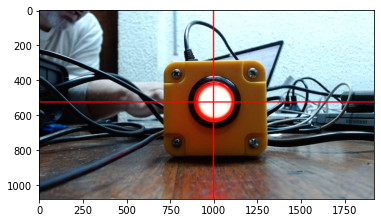

In [8]:
_, img = cap.read()                                 # lee una imagen

frame = cv2.line(img, (0,y_target),(img.shape[1], y_target), (0,0,255), 5)
frame = cv2.line(img, (x_target,0),(x_target, img.shape[0]), (0,0,255), 5)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 
plt.show()

In [9]:
n = 0                                               # contador de datos
estado = 0                                          # estado del boton
t_proceso = []                                      # almacena los tiempos de proceso

while cap.isOpened():

    _, frame = cap.read()                           # lee el siguiente frame (img)

    s = boton_status(frame, x_target, y_target)     # obtiene el status del equipo
    
    if estado<s:                                    # significa que el equipo se encendió (status==0) y (s==1)
        ti = time.time()                            # guarda el tiempo de encendido
        estado = 1                                  # cambia el valor de la variable status
    
    if estado>s:                                    # (estado==1) and (s==0):
        tp = time.time() - ti                       # calcula el tiempo de proceso
        t_proceso.append(tp)                        # agrega el tiempo de proceso a la lista 
        n += 1                                      # contador de datos almacenados
        print(f"({n}): {tp} min")
        estado = 0                                  # cambia el valor de la variable status
    
    if n>=n_max: break                              # si llego a la cantidad de datos requerida, termina el proceso

(1): 0.3268458843231201 min
(2): 0.7398898601531982 min
(3): 2.293060779571533 min
(4): 1.7622771263122559 min
(5): 4.182430028915405 min
(6): 2.872432231903076 min
(7): 4.387303113937378 min
(8): 1.803069829940796 min
(9): 0.576178789138794 min
(10): 3.7691550254821777 min
(11): 2.2527551651000977 min
(12): 3.0334510803222656 min
(13): 1.272650957107544 min
(14): 4.223918199539185 min
(15): 2.048543930053711 min
(16): 2.0895519256591797 min
(17): 4.512462139129639 min
(18): 2.8296308517456055 min
(19): 3.608595848083496 min
(20): 1.4727418422698975 min
(21): 4.013186931610107 min
(22): 0.5708470344543457 min
(23): 3.7342469692230225 min
(24): 1.4342939853668213 min
(25): 1.9267358779907227 min
(26): 4.516000032424927 min
(27): 2.8721868991851807 min
(28): 3.5652058124542236 min
(29): 2.664310932159424 min
(30): 4.381577968597412 min
(31): 2.3394322395324707 min
(32): 2.7529330253601074 min
(33): 6.067428112030029 min
(34): 3.359569787979126 min
(35): 2.831557035446167 min
(36): 0.2059

TypeError: 'NoneType' object is not subscriptable

In [6]:
# libera el objeto video
cap.release()   

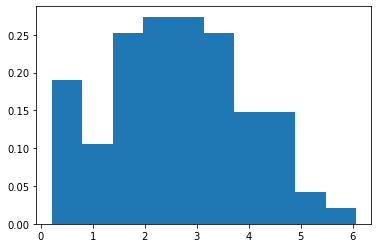

In [10]:
# dibuja el histogrma del tiempo de proceso

plt.hist(t_proceso, density=True)
plt.show()

,sumsquare_error,aic,bic,kl_div
norm,1.807638,341.208241,-299.207800,inf
lognorm,1.811995,339.051138,-294.618335,inf
erlang,1.813288,338.546428,-294.560548,inf
gamma,1.813546,338.414677,-294.549026,inf
exponpow,1.816026,327.344600,-294.438325,inf


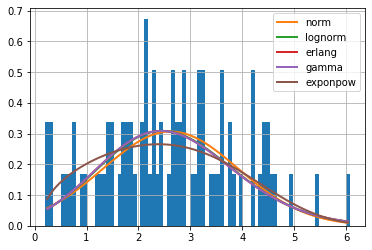

In [11]:
# realiza el ajuste

import fitter as ft

f = ft.Fitter(t_proceso, bins=80, timeout=100, distributions=['norm', 'erlang', 'lognorm','exponpow', 'gamma', 'uniform'])
f.fit()
f.summary()


In [12]:
# calcula los parametros de la distribución seleccionada

f.fitted_param['norm']

(2.61991482016481, 1.2995334374749676)